In [1]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [6]:
y.dtype

dtype('O')

In [7]:
y = y.astype(np.uint8)

In [8]:
y.dtype

dtype('uint8')

In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [10]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

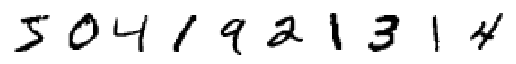

In [11]:
plt.figure(figsize=(9,9))
example_images = X[:10]
plot_digits(example_images, images_per_row=10)
plt.show()

In [12]:
images = X[0:10]
labels = y[0:10]

In [13]:
images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [15]:
images.shape, labels.shape

((10, 784), (10,))

In [23]:
def plot_digits_no_cmap(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    # plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.imshow(image, **options)
    plt.axis("off")

# Basic building block - weighted sum - (w1 * x1) + (w2 * x2) + (w3 * x3)

In [16]:
def w_sum(a, b):
    
    assert(len(a) == len(b))
    output = 0
        
    # w1 * x1 part 
    for i in range(len(a)):
        output += (a[i] * b[i])
        
    return output

# Mulitply each input row with its weight vector row

In [17]:
def vector_matrix_multiplication(ip_vector, weight_matrix):
   
    assert(len(ip_vector) == len(weight_matrix))
    output = np.zeros(len(ip_vector))
    
    # For each weight row - weight_matrix[i]
    # Multiplying each input vector row with each weight vector row in the weight matrix
    # wi * xi for each row

    for i in range(len(ip_vector)):
        output[i] = w_sum(ip_vector[i], weight_matrix[i])
    return output

# Basic Neural Network

In [18]:
def neural_network(input, weights):
    pred = vector_matrix_multiplication(input, weights)
    return pred

# Vector product

In [19]:
def outer_prod(a, b):
    # just a matrix of zeros
    out = np.zeros((len(a), len(b[0])))

    for i in range(len(a)):
        for j in range(len(b[i])):
            out[i][j] = a[i] * b[i][j]
    return out

# MNIST problem with weights

In [30]:
def basic_neural_network(input, labels, weights, iter=10):
    alpha = 0.01

    eps = 0.0001
    # For each weighted sum - one error 
    error = np.zeros(len(labels))
    # For each weighted sum - one delta
    delta = np.zeros(len(labels))
    
    def update_weights(weights, labels):

        for i in range(len(labels)):
            delta[i] = pred[i] - labels[i]
            error[i] = (pred[i] - labels[i]) ** 2

        weight_deltas = outer_prod(delta, images)

        for i in range(len(weights)):
            for j in range(len(weights[0])):
                weights[i][j] -= alpha * weight_deltas[i][j]

    for i in range(iter):
        # print('i is ', i)
        pred = neural_network(images, weights)
        update_weights(weights, labels)
    return weights, pred, error, delta

In [77]:
# This will be a weight matrix with <10> rows and 784 columns
weights_full = np.random.randn(images.shape[0], images.shape[1])
updated_weights, preds, error, delta = basic_neural_network(input, labels, weights_full, iter=2)

In [78]:
print('Predictions ', preds)
print('error ', error)
print('delta ', delta)

Predictions  [ 7.32908405e+07 -3.11109440e+08  6.82850477e+07  2.20796747e+07
 -4.14735105e+07 -3.85195254e+08 -1.05925830e+08 -3.53469969e+07
  1.80825905e+07 -1.04421478e+08]
error  [5.37154656e+15 9.67890838e+16 4.66284720e+15 4.87511989e+14
 1.72005282e+15 1.48375385e+17 1.12202816e+16 1.24941040e+15
 3.26980044e+14 1.09038459e+16]
delta  [ 7.32908355e+07 -3.11109440e+08  6.82850437e+07  2.20796737e+07
 -4.14735195e+07 -3.85195256e+08 -1.05925831e+08 -3.53469999e+07
  1.80825895e+07 -1.04421482e+08]


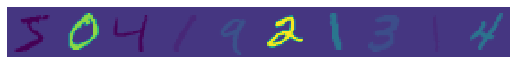

In [79]:
plt.figure(figsize=(9,9))
example_images = updated_weights[:10]
plot_digits_no_cmap(example_images, images_per_row=10)
plt.show()

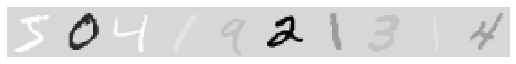

In [80]:
plt.figure(figsize=(9,9))
example_images = updated_weights[:10]
plot_digits(example_images, images_per_row=10)
plt.show()

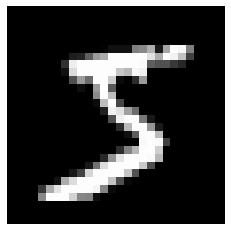

In [81]:
some_digit = updated_weights[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

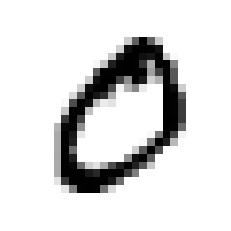

In [82]:
some_digit = updated_weights[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

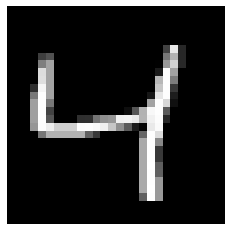

In [83]:
some_digit = updated_weights[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

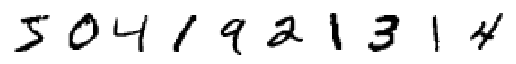

In [84]:
# The original 10 digits
plt.figure(figsize=(9,9))
example_images = X[:10]
plot_digits(example_images, images_per_row=10)
plt.show()

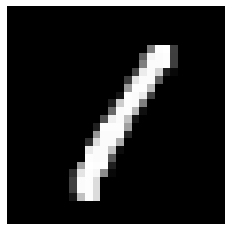

In [85]:
some_digit = updated_weights[3]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

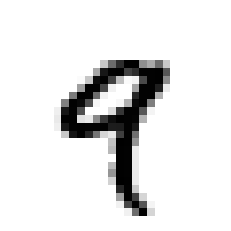

In [86]:
some_digit = updated_weights[4]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

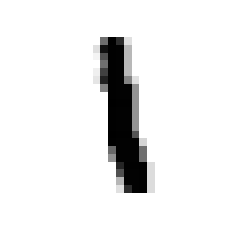

In [87]:
some_digit = updated_weights[6]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

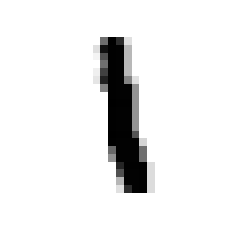

In [88]:
some_digit = X[6]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()